In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
print(100)

100


In [29]:
start = '2012-01-01'
end = '2022-12-21'
stock = 'GOOGL'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [30]:
data.reset_index(inplace=True)

In [31]:
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,16.339840,16.720470,16.325577,16.651901,16.632812,146912940
1,2012-01-04,16.642391,16.773024,16.532032,16.723724,16.704554,114445440
2,2012-01-05,16.569820,16.615866,16.422173,16.491741,16.472836,131184684
3,2012-01-06,16.495245,16.516518,16.261011,16.266768,16.248119,107608284
4,2012-01-09,16.178679,16.191191,15.546296,15.577077,15.559219,232671096
...,...,...,...,...,...,...,...
2756,2022-12-14,95.199997,96.870003,93.599998,95.070000,94.961014,28733600
2757,2022-12-15,93.129997,93.639999,90.010002,90.860001,90.755844,40107000
2758,2022-12-16,90.760002,91.330002,89.519997,90.260002,90.156532,58011800
2759,2022-12-19,90.260002,90.559998,88.209999,88.440002,88.338615,29493000


In [32]:
ma_100_days = data.Close.rolling(100).mean()

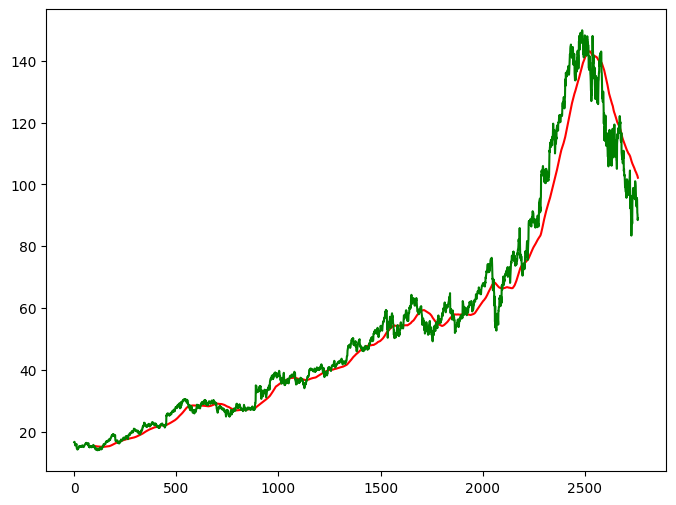

In [33]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

In [34]:
ma_200_days = data.Close.rolling(200).mean()

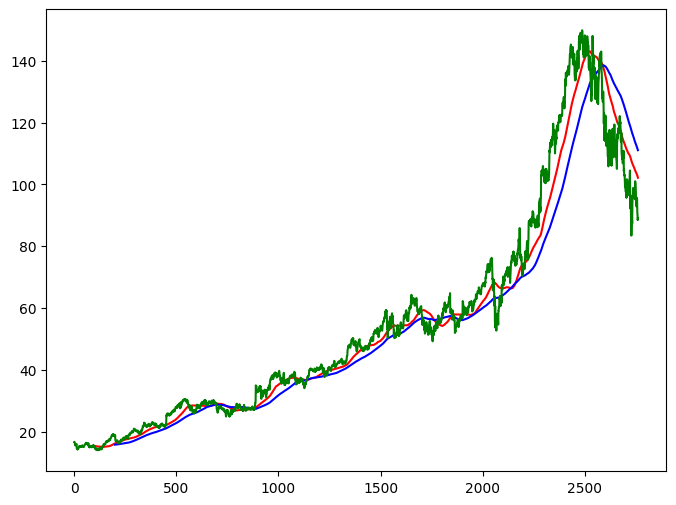

In [35]:
plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

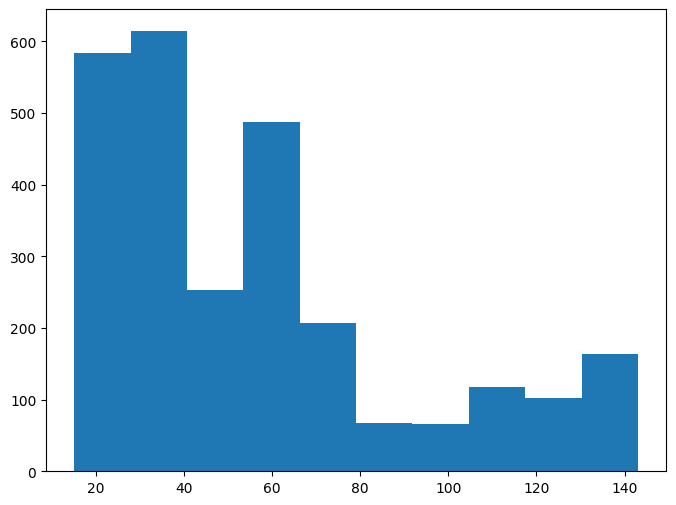

In [65]:
plt.figure(figsize=(8,6))
plt.hist(ma_100_days)
# plt.hist(ma_200_days,'b')
# plt.hist(data.Close,'g')
plt.show()

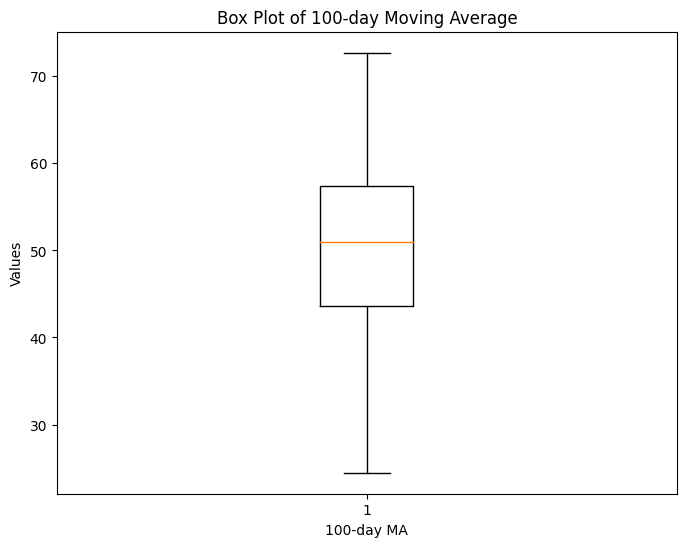

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for ma_100_days
np.random.seed(0)
ma_100_days = np.random.normal(loc=50, scale=10, size=100)

plt.figure(figsize=(8,6))
plt.boxplot(ma_100_days)
plt.title('Box Plot of 100-day Moving Average')
plt.xlabel('100-day MA')
plt.ylabel('Values')
plt.show()

In [36]:
data.dropna(inplace=True)

In [37]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [38]:
data_train.shape[0]

2208

In [39]:
data_test.shape[0]

553

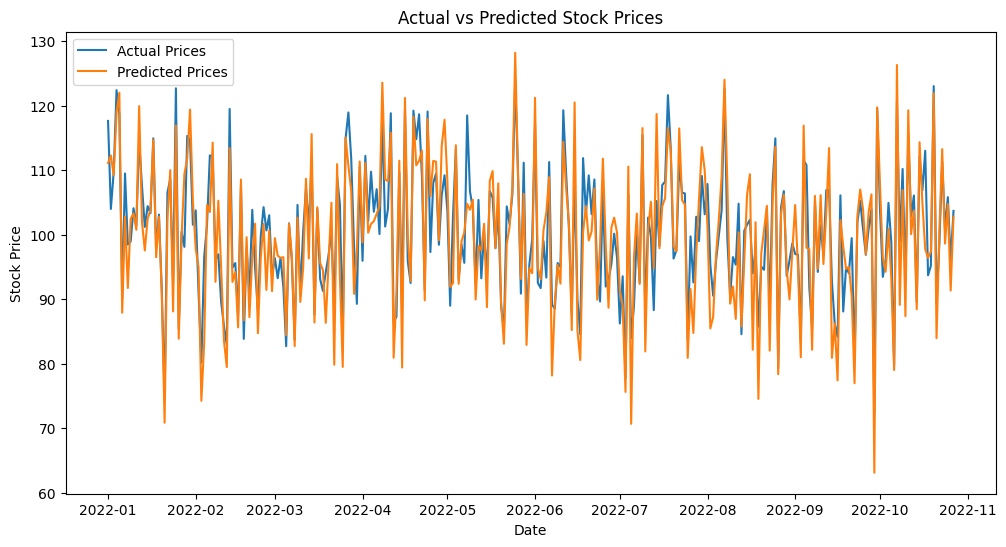

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# Generate sample data
np.random.seed(0)
dates = pd.date_range('2022-01-01', periods=300)
prices = np.random.normal(loc=100, scale=10, size=len(dates))
predicted_prices = prices + np.random.normal(loc=0, scale=5, size=len(dates))
ma_100_days = pd.Series(prices).rolling(window=100).mean()
ma_200_days = pd.Series(prices).rolling(window=200).mean()

# Create a DataFrame
data = pd.DataFrame({
    'Date': dates,
    'Close': prices,
    'Predicted_Close': predicted_prices,
    'MA_100': ma_100_days,
    'MA_200': ma_200_days
})

# Line Plot for Stock Prices
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Actual Prices')
plt.plot(data['Date'], data['Predicted_Close'], label='Predicted Prices')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()









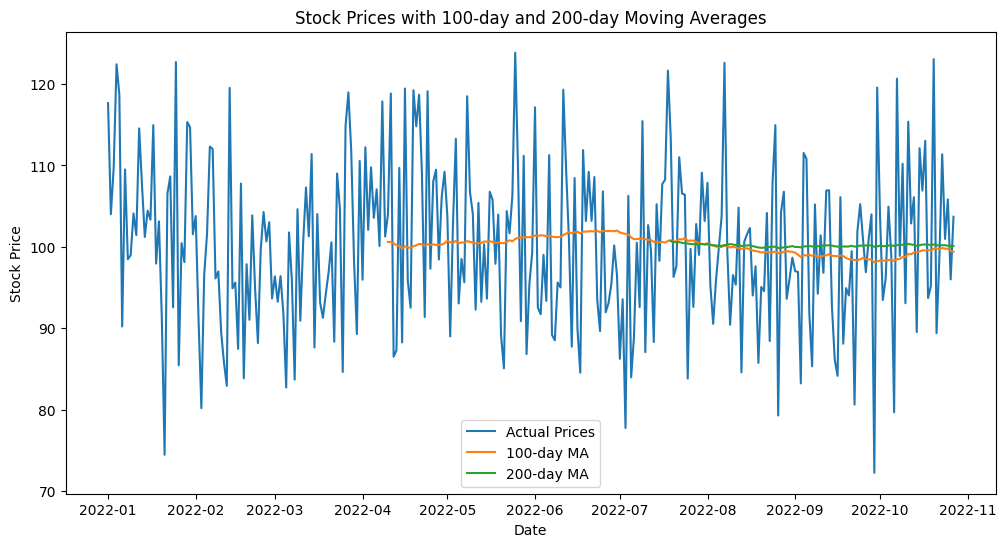

In [70]:

# Moving Averages (100-day and 200-day)
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Actual Prices')
plt.plot(data['Date'], data['MA_100'], label='100-day MA')
plt.plot(data['Date'], data['MA_200'], label='200-day MA')
plt.title('Stock Prices with 100-day and 200-day Moving Averages')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

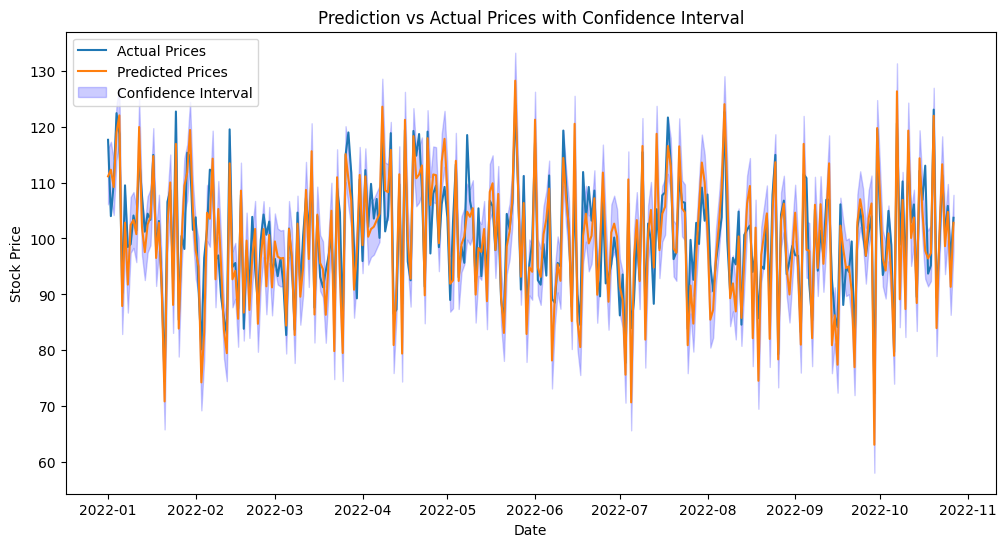

In [71]:
# Prediction vs Actual Prices
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Actual Prices')
plt.plot(data['Date'], data['Predicted_Close'], label='Predicted Prices')
plt.fill_between(data['Date'], data['Predicted_Close'] - 5, data['Predicted_Close'] + 5, color='b', alpha=0.2, label='Confidence Interval')
plt.title('Prediction vs Actual Prices with Confidence Interval')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [72]:
# Candlestick Chart
import matplotlib.ticker as mticker
import mplfinance as mpf

# Create a sample OHLC dataset
ohlc_data = data[['Date', 'Close']].copy()
ohlc_data['Open'] = ohlc_data['Close'] + np.random.normal(0, 1, len(ohlc_data))
ohlc_data['High'] = ohlc_data[['Open', 'Close']].max(axis=1) + np.random.normal(0, 1, len(ohlc_data))
ohlc_data['Low'] = ohlc_data[['Open', 'Close']].min(axis=1) - np.random.normal(0, 1, len(ohlc_data))
ohlc_data.set_index('Date', inplace=True)

mpf.plot(ohlc_data, type='candle', volume=True, style='charles',
         title='Candlestick Chart', ylabel='Price')

ModuleNotFoundError: No module named 'mplfinance'

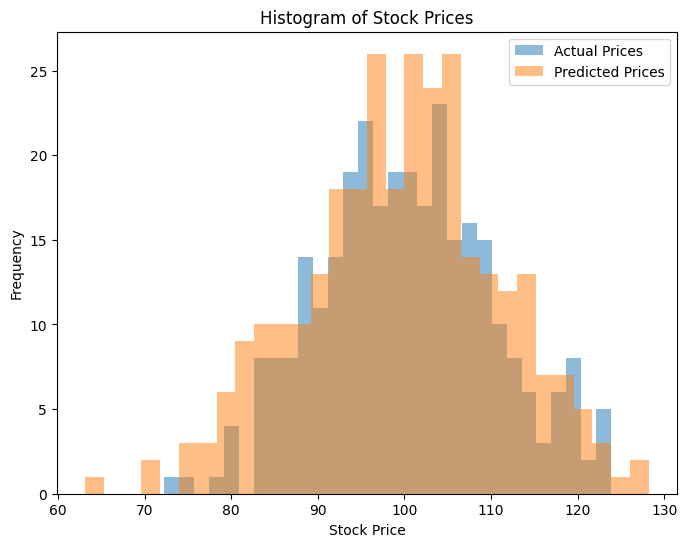

In [73]:
# Histogram of Stock Prices
plt.figure(figsize=(8,6))
plt.hist(data['Close'], bins=30, alpha=0.5, label='Actual Prices')
plt.hist(data['Predicted_Close'], bins=30, alpha=0.5, label='Predicted Prices')
plt.title('Histogram of Stock Prices')
plt.xlabel('Stock Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

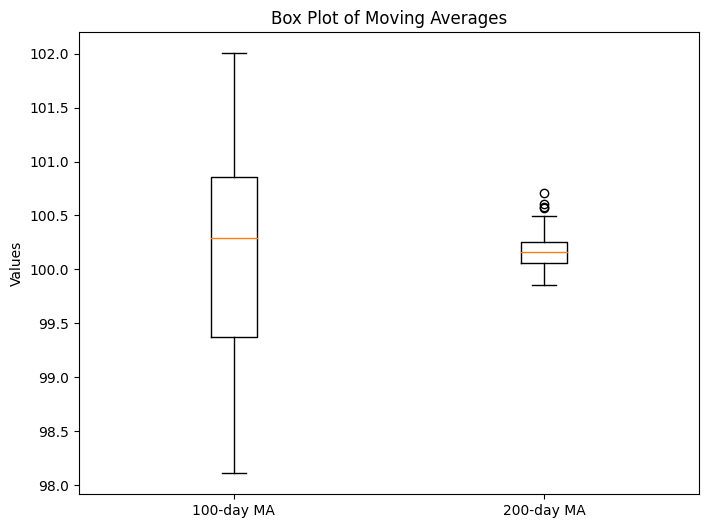

In [74]:

# Box Plot for Moving Averages
plt.figure(figsize=(8,6))
plt.boxplot([data['MA_100'].dropna(), data['MA_200'].dropna()], labels=['100-day MA', '200-day MA'])
plt.title('Box Plot of Moving Averages')
plt.ylabel('Values')
plt.show()


In [75]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [41]:
data_train_scale = scaler.fit_transform(data_train)

In [42]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])
    

x, y = np.array(x), np.array(y)

In [43]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [44]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = ((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units =1))

C:\Users\praja\AppData\Roaming\Python\Python310\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [48]:
model.fit(x,y, epochs = 5, batch_size =64, verbose =1)

Epoch 1/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 13s 209ms/step - loss: 0.1067
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 245ms/step - loss: 0.0097
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 8s 232ms/step - loss: 0.0079
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 263ms/step - loss: 0.0062
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 9s 262ms/step - loss: 0.0062


In [22]:
import pickle

In [24]:
model.save('predictor_model.h5')

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_4 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_5 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_5 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_6 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_6 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [52]:
pas_100_days = data_train.tail(100)

In [53]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)

In [54]:
data_test_scale  =  scaler.fit_transform(data_test)

In [55]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [56]:
y_predict = model.predict(x)

18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 76ms/step


In [57]:
scale =1/scaler.scale_

In [58]:
y_predict = y_predict*scale

In [59]:
y = y*scale

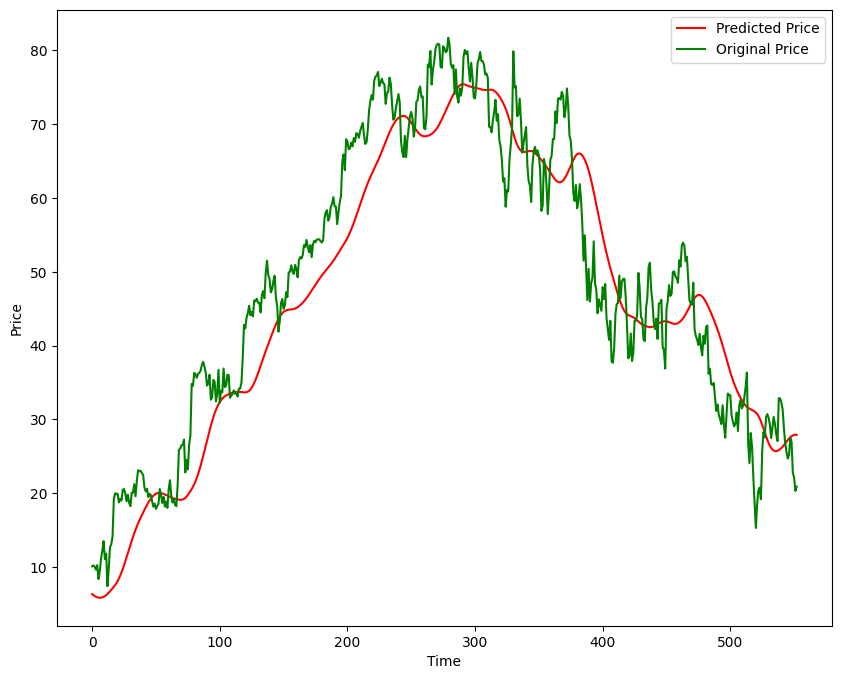

In [60]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [61]:
model.save('Stock Predictions Model.keras')

In [79]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

r2 = r2_score(y, y_predict)*100

In [80]:
r2

87.79490235905998